In [1]:
import pandas as pd
import json
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import os
from os import listdir
from os.path import isfile, join
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from profanity_check import predict, predict_prob

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

C:\Users\hiran\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\hiran\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\hiran\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use a

In [2]:
date_today = datetime.today().strftime("%Y-%m-%d")

***
# Channel data

In [3]:
temp = []
with open('channel_data (1).json', 'r', encoding='utf8') as f:
    for line in f:
        temp.append(json.loads(line))
channel_df = pd.DataFrame(temp)

In [4]:
print(channel_df.shape)

(7181, 11)


In [5]:
# useless content
channel_df['publicReviewerNotes'].value_counts(dropna=False)

None                                                                                                                                                                     7178
Anti-trump campaign run by constitutional conservatives with content supporting biden in the 2020 election. Note:  classifications are based on content not creators.       1
Content primarily critical of woke, THOT's, and censorship.                                                                                                                 1
This is the channel that had the senator who let people into the capitol building.                                                                                          1
Name: publicReviewerNotes, dtype: int64

In [6]:
# useless content
channel_df['publicCreatorNotes'].value_counts(dropna=False)

None                                                       7176
Creator disputes this classification                          2
Disputed by creator who identifies as classical liberal       1
                                                              1
Based                                                         1
Name: publicCreatorNotes, dtype: int64

In [7]:
del channel_df['publicCreatorNotes']
del channel_df['publicReviewerNotes']

In [8]:
channel_df

,channelId,channelTitle,tags,lr,logoUrl,channelViews,subs,reviewsHuman,description
0,UC9k-yiEpRHMNVOnOi_aQK8w,Inside Edition,[Mainstream News],C,https://yt3.ggpht.com/ytc/AKedOLQ6jUcMzk2GqRxL...,17774168927,10300000.0,1,Inside Edition is television's longest-running...
1,UC8-Th83bH_thdKZDJCrn88g,The Tonight Show Starring Jimmy Fallon,"[LateNightTalkShow, PartisanLeft, SocialJustice]",L,https://yt3.ggpht.com/Lp9cu-xgKL0QYxdJ268CaZ63...,15524525324,29200000.0,1,The Tonight Show Starring Jimmy Fallon feature...
2,UCupvZG-5ko_eiXAupbDfxWw,CNN,"[Mainstream News, PartisanLeft]",L,https://yt3.ggpht.com/ytc/AKedOLRTLcDi_bPCV2bB...,11114157650,13600000.0,3,CNN operates as a division of Turner Broadcast...
3,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,[Mainstream News],C,https://yt3.ggpht.com/Iv4QbKjK63MB70UvQ22FnTWF...,10963074796,12800000.0,3,ABC News is your daily news outlet for breakin...
4,UCXIJgqnII2ZOINSWNOGFThA,Fox News,"[Mainstream News, PartisanRight]",R,https://yt3.ggpht.com/ytc/AKedOLQcyBtNBVCDXOr5...,10499411936,9160000.0,3,FOX News Channel (FNC) is a 24-hour all-encomp...
...,...,...,...,...,...,...,...,...,...
7176,UC3FqYK9UCKtmcTwSYo7mwpw,Foundational Future,"[PartisanRight, WhiteIdentitarian]",R,https://yt3.ggpht.com/ytc/AKedOLQSULHavfZdol1T...,0,10500.0,1,A nation that forgets its past has no future.
7177,UCFyLpcPQTl8x0P5bWuJUJwA,Angry Little Girl,[AntiTheist],C,https://yt3.ggpht.com/ytc/AKedOLTrvrWiEbJo2uxv...,0,11000.0,0,The reports of my death are greatly exaggerated.
7178,UCDmOgumXzPp-JEMHuEqobqA,The Word Warrior,"[PartisanRight, ReligiousConservative]",R,https://yt3.ggpht.com/ytc/AKedOLSrkc2YjjOYOaEE...,0,10600.0,0,
7179,UCPSWJqJXf1llYh2tHBihlVw,Anonymous,[Conspiracy],R,https://yt3.ggpht.com/d70lkhqS4-RlK1gSJXyg-fiX...,0,342000.0,0,\n


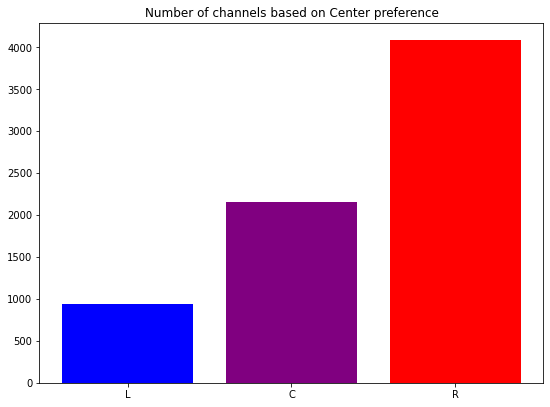

In [9]:
# Number of channels based on Center preference
channel_categories = channel_df.groupby('lr').count()[['channelId']].sort_values(by='channelId')

categories = list(channel_categories.index)
no_of_channels = list(channel_categories['channelId'])

channel_centeredness = plt.figure(figsize=(7, 5))
ax = channel_centeredness.add_axes([0,0,1,1])
ax.bar(categories, no_of_channels, color=['blue', 'purple', 'red'])
plt.title('Number of channels based on Center preference')
plt.savefig('Number of channels based on Center preference.png',bbox_inches='tight', dpi=150)
plt.show()

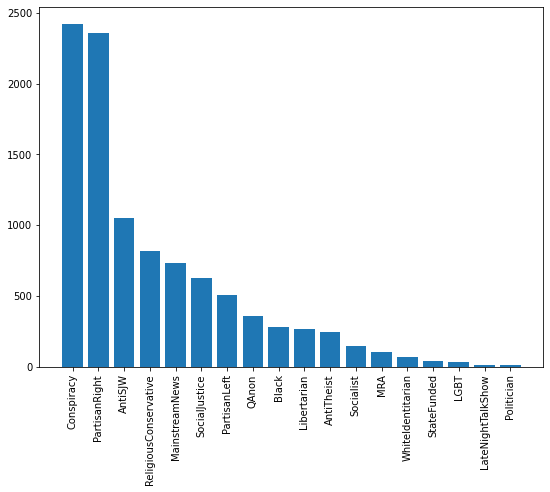

In [10]:
# Number of channels based on tag
channel_tags = channel_df.explode('tags').groupby('tags').count()[['channelId']].sort_values(by='channelId', ascending=False)

tags = channel_tags.index.str.replace(' ', '')
no_of_channels = list(channel_tags['channelId'])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(tags, no_of_channels)
plt.xticks(rotation = 90)
plt.savefig('Number of channels based on Channel Tags.png',bbox_inches='tight', dpi=150)
plt.show()

***
# Removed videos data

In [11]:
# import removed channels data
df_removed = pd.read_csv(
    'removed_videos_2021.csv', 
    encoding='utf8', 
    low_memory=False, 
    lineterminator='\n', 
    index_col=0)

In [12]:
# removed channels descriptive
print(df_removed.shape)
print(sorted(df_removed.columns.tolist()))

(552651, 13)
['channelId', 'channelTitle', 'copyrightHolder', 'durationSecs', 'errorType', 'errorUpdated', 'hasCaptions', 'lastSeen', 'platform', 'uploadDate', 'videoId', 'videoTitle', 'videoViews']


In [13]:
df_removed['platform'].value_counts()

YouTube    552651
Name: platform, dtype: int64

In [14]:
del df_removed['platform']

#### Minor data adjustments

In [15]:
# change to datetime
df_removed['uploadDate'] = pd.to_datetime(df_removed['uploadDate'])

# add signifier for removed
df_removed['removed'] = True

# shape
df_removed.shape

(552651, 13)

In [16]:
df_removed.groupby('errorType').count()[['videoId']].sort_values(by='videoId', ascending=False)

,videoId
errorType,
Channel Removed,305358
Unavailable,83294
Removed by uploader,80705
Private,70903
Copyright claim,8102
Community guidelines,2318
Terms of service,1166
Hate speech,423
Harassment and bullying,373


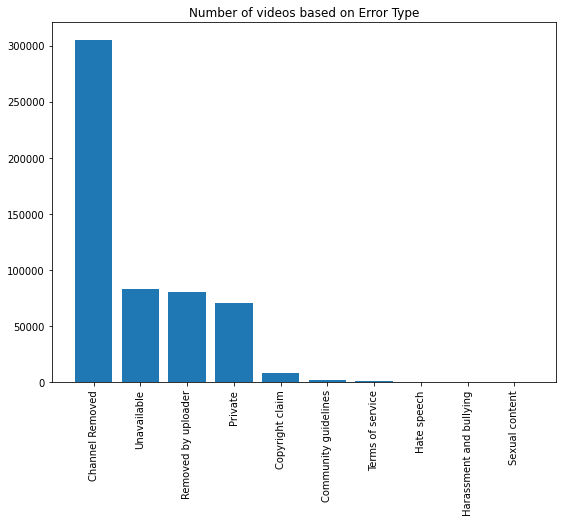

In [17]:
# Number of videos based on errorType
videos_errorType = df_removed.groupby('errorType').count()[['videoId']].sort_values(by='videoId', ascending=False)

error_tags = list(videos_errorType.index)
no_of_videos = list(videos_errorType['videoId'])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(error_tags, no_of_videos)
plt.xticks(rotation = 90)
plt.title('Number of videos based on Error Type')
plt.savefig('Number of videos based on Error Type.png',bbox_inches='tight', dpi=150)
plt.show()

***
# Unremoved videos data

#### Unremoved means the videos which were taken by scraping all videos from a particular channel.
#### The unremoved videos were not removed by YouTube.
#### Uses ALL unremoved channel data we have in current directory

In [18]:
# first two characters in file name must be "UC"
unremoved_channel_files = [x for x in [f for f in listdir(os.getcwd())] if x[:2]=='UC']

# file extension must make sense
unremoved_channel_files = [x for x in unremoved_channel_files if any([x[-3:]=='tab', 
                                                                      x[-3:]=='tsv', 
                                                                      x[-3:]=='csv'])]

print(f'Length of unremoved channels list: {len(unremoved_channel_files)}.')

Length of unremoved channels list: 98.


In [19]:
# reading in unremoved channel data
unremoved_videos_df = pd.DataFrame({})

for file in unremoved_channel_files:
    temp_df = pd.read_csv(file, encoding='utf8', 
                          low_memory=False, 
                          lineterminator='\n', 
                          delimiter='\t', 
                          on_bad_lines = 'skip',
                          index_col=0)
    unremoved_videos_df = pd.concat([unremoved_videos_df, temp_df])
    
# remove duplicates by video and channel
unremoved_videos_df = unremoved_videos_df.drop_duplicates(subset=['videoId', 'channelId'])

In [20]:
# preview unremoved_videos_df
print(unremoved_videos_df.shape)
unremoved_videos_df.head(2)

(224617, 22)


,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,tags,videoCategoryId,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
position,,,,,,,,,,,,,,,,,,,,,,
1,UC-SJ6nODDmufqBzPBwCvYvQ,CBS Mornings,euKwv6yaydc,2022-04-18T15:21:43Z,2022-04-18 15:21:43,Singer-songwriter Janelle Monáe discusses her ...,Grammy-nominated singer-songwriter Janelle Mon...,"video,cbs,news,janelle monae,singer,songwriter...",25,News & Politics,PT5M43S,343,2d,hd,false,NaN,1.0,4634.0,153.0,NaN,0.0,51.0
2,UC-SJ6nODDmufqBzPBwCvYvQ,CBS Mornings,cGaq-cLtpKU,2022-04-18T15:02:53Z,2022-04-18 15:02:53,FAA sees record high number of reported laser ...,"Reported aircraft laser strikes surged over 9,...","video,cbs,news,aircraft,laser,strike,surge,fed...",25,News & Politics,PT2M56S,176,2d,hd,false,https://i.ytimg.com/vi/cGaq-cLtpKU/maxresdefau...,1.0,2575.0,56.0,NaN,0.0,33.0


In [21]:
del unremoved_videos_df['videoCategoryId']

In [22]:
# removing rows with bad/messy data
to_remove = ["48587", "16218", "2450", "PT3M14S", "PT8M21S", "PT12M24S", "12778", "2985", "3265", "16298", 
             "PT13M27S", "10061", "31131", "67447", "398", "PT9M10S", "424", "PT9M", "1966", "PT54S", "PT1M23S", 
             "1514", "PT5M18S", "PT1M45S", "30873", "PT10S", "PT17S", "40238", "5710", "3708", "PT11M30S", 
             "23876", "1385"]

# removing bad/messy data
unremoved_videos_df = unremoved_videos_df[unremoved_videos_df["videoCategoryLabel"].isin(to_remove)==False]

print(unremoved_videos_df.shape)

(224585, 21)


#### Minor data adjustments

Changing column names, minor cleaning, etc.

In [23]:
# How many videos published 2022 or later?
print(f"Dates later than 2022: {unremoved_videos_df[unremoved_videos_df['publishedAt'] >= '2022'].shape[0]:,}")

# How many dates in 2021?
print(f"Videos published in 2021: {unremoved_videos_df[(unremoved_videos_df['publishedAt'] < '2022') & (unremoved_videos_df['publishedAt'] >= '2021')].shape[0]:,}")

# How many videos published before 2021?
print(f"Dates earlier than 2021: {unremoved_videos_df[unremoved_videos_df['publishedAt'] <= '2021'].shape[0]:,}")

Dates later than 2022: 20,791
Videos published in 2021: 56,854
Dates earlier than 2021: 146,940


In [24]:
# changing column name
unremoved_videos_df = unremoved_videos_df.rename(columns={"publishedAt": "uploadDate"})

# remove bad column so we can convert to datetime
unremoved_videos_df = unremoved_videos_df[unremoved_videos_df['uploadDate']!="91"]

# to datetime
unremoved_videos_df["uploadDate"] = pd.to_datetime(unremoved_videos_df["uploadDate"])

# removing duplicate column
del unremoved_videos_df['publishedAtSQL']

In [25]:
# add column for removed designator
unremoved_videos_df['removed'] = False

##### Note: 

- There are only 72 unique channels. That's because we imported from 90 files, but had 18 duplicates.

In [26]:
# how many unique channels?
len(unremoved_videos_df['channelId'].unique())

72

***
# Joining data

In [27]:
# joining unremoved and removed videos
all_vids = pd.concat([df_removed, unremoved_videos_df])

# four columns were exactly the same names and thus merged

In [28]:
print(all_vids.shape)
all_vids.head(2)

(777235, 28)


,videoId,channelId,errorType,copyrightHolder,errorUpdated,lastSeen,videoTitle,channelTitle,durationSecs,videoViews,uploadDate,hasCaptions,removed,videoDescription,tags,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
0,PWr3XfJ6qUw,UCNbQnkptty3cGVnHkJIJFwQ,Channel Removed,NaN,2021-01-01T00:03:15.2061309Z,2020-12-31T00:07:45.203875Z,ΤΣΙΟΔΡΑΣ ΚΑΤΑΣΚΕΥΑΖΟΥΜΕ ΙΟΥΣ ΓΙΑ ΝΑ ΠΑΡΑΣΚΕΥΑΣ...,SFAGI SFAGIGR,28.0,2237.0,2020-04-05 00:00:00+00:00,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-wFkHMJ3BcM,UCNbQnkptty3cGVnHkJIJFwQ,Channel Removed,NaN,2021-01-01T00:03:15.2061309Z,2020-12-31T00:07:45.203875Z,"Ο ΝΤΟΝΑΛΝΤ ΤΡΑΜΠ ΚΑΙ Η ΜΕΛΑΝΙΑ, ΕΥΧΗΘΗΚΑΝ ΚΑΛΑ...",SFAGI SFAGIGR,156.0,5914.0,2020-12-20 00:00:00+00:00,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Note on duplicates

- here we see video IDs where there are multiples
- this is because the same video appeared in both the "removed videos" and "unremoved videos" datasets

In [29]:
multiples = sorted(all_vids.groupby('videoId').count()[all_vids.groupby('videoId').count()['channelId'] == 2].index.tolist())

# # show DF of videoID duplicates
all_vids[all_vids['videoId'].isin(multiples)].sort_values(by=['videoId', 'removed']).fillna(method="ffill").head(4)

,videoId,channelId,errorType,copyrightHolder,errorUpdated,lastSeen,videoTitle,channelTitle,durationSecs,videoViews,uploadDate,hasCaptions,removed,videoDescription,tags,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
455,-VKGvmNzjvY,UCRkEvvXGy2ij9xC7co9MhSg,NaN,NaN,NaN,NaN,"Silent Sanctuary ""Pasensya Kana"" Araw ng Panab...",Hermann Candelaria,NaN,NaN,2019-04-01 17:05:39+00:00,NaN,False,Subscribe and Share! Silent Sanctuary at 18th ...,"silent sanctuary,silentsanctuary,araw ng panab...",People & Blogs,PT5M31S,331,2d,hd,False,https://i.ytimg.com/vi/-VKGvmNzjvY/maxresdefau...,NaN,250.0,4.0,NaN,0.0,0.0
293641,-VKGvmNzjvY,UCRkEvvXGy2ij9xC7co9MhSg,Private,NaN,2021-06-05T01:04:59.8182075Z,2021-05-04T00:21:35.7604541Z,"Silent Sanctuary ""Pasensya Kana"" Araw ng Panab...",Hermann Candelaria,331.0,249.0,2019-04-01 16:40:41+00:00,False,True,Subscribe and Share! Silent Sanctuary at 18th ...,"silent sanctuary,silentsanctuary,araw ng panab...",People & Blogs,PT5M31S,331,2d,hd,False,https://i.ytimg.com/vi/-VKGvmNzjvY/maxresdefau...,NaN,250.0,4.0,NaN,0.0,0.0
248,-ucb0u_7M1w,UCRkEvvXGy2ij9xC7co9MhSg,Private,NaN,2021-06-05T01:04:59.8182075Z,2021-05-04T00:21:35.7604541Z,Revival around the world // People turn there ...,Hermann Candelaria,331.0,249.0,2021-02-18 17:28:38+00:00,False,False,"February 14, 2021 // CAC Samal - Sunday Worshi...","silent sanctuary,silentsanctuary,araw ng panab...",Entertainment,PT33M11S,1991,2d,hd,False,https://i.ytimg.com/vi/-ucb0u_7M1w/maxresdefau...,NaN,377.0,21.0,NaN,0.0,4.0
258204,-ucb0u_7M1w,UCRkEvvXGy2ij9xC7co9MhSg,Private,NaN,2021-04-15T01:10:40.6309889Z,2021-04-14T00:52:01.7848361Z,Revival around the world // People turn there ...,Hermann Candelaria,1991.0,373.0,2021-02-18 00:00:00+00:00,True,True,"February 14, 2021 // CAC Samal - Sunday Worshi...","silent sanctuary,silentsanctuary,araw ng panab...",Entertainment,PT33M11S,1991,2d,hd,False,https://i.ytimg.com/vi/-ucb0u_7M1w/maxresdefau...,NaN,377.0,21.0,NaN,0.0,4.0


In [30]:
all_vids[all_vids['videoId'].isin(multiples)].sort_values(by=['videoId', 'removed']).fillna(method="ffill", inplace=True)

In [31]:
# need to remove the duplicate videos, keeping on the removed=True version

# checking ordering: removed == True should be first, and we'll keep the first
all_vids[all_vids['videoId']=='7umBOlCXBXg']

,videoId,channelId,errorType,copyrightHolder,errorUpdated,lastSeen,videoTitle,channelTitle,durationSecs,videoViews,uploadDate,hasCaptions,removed,videoDescription,tags,videoCategoryLabel,duration,durationSec,dimension,definition,caption,thumbnail_maxres,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
547867,7umBOlCXBXg,UC-SJ6nODDmufqBzPBwCvYvQ,Unavailable,NaN,2022-01-05T00:40:28.2620618Z,2021-12-22T23:01:54.8029225Z,"Drew Barrymore on talk show's renewal, new ""Dr...",CBS Mornings,553.0,34177.0,2021-03-31 14:26:58.713432900+00:00,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,7umBOlCXBXg,UC-SJ6nODDmufqBzPBwCvYvQ,NaN,NaN,NaN,NaN,"Drew Barrymore on talk show's renewal, new ""Dr...",CBS Mornings,NaN,NaN,2021-03-31 13:40:36+00:00,NaN,False,"Drew Barrymore, the host and executive produce...","drew barrymore talk show,Drew barrymore,drew b...",News & Politics,PT9M13S,553,2d,hd,false,https://i.ytimg.com/vi/7umBOlCXBXg/maxresdefau...,1.0,34997.0,538.0,NaN,0.0,75.0


In [32]:
# drop dupes
all_vids = all_vids.drop_duplicates(subset= "videoId", keep='first')

In [33]:
# check work
print(all_vids.shape)

# how many unique channels?
print(len(all_vids['channelId'].value_counts()))

(776849, 28)
4770


***
# Filter by channels
#### 3 randomly chosen channels for each of the 18 political categories.

There are 18 political categories of video (Mainstream Media, Social Justice, etc.). These political categories were already tagged by researchers affiliated with Transparency Tube.

- We are interested in predicting if a video is removed or not, so we need to have videos that are and are not removed.
- We cannot easily download all videos ever posted for all 7,000+ political channels monitored by Transparency Tube.
- For that reason, we took a random sample of three channels for each of the 18 political categories.
- Each of these channels was scraped with a separate tool.

In [34]:
# channels we're using
# three random channels per category
l = ["UC5apkKkeZQXRSDbqSalG8CQ", "UCfwE_ODI1YTbdjkzuSi1Nag", "UCla6APLHX6W3FeNLc8PYuvg", 
     "UCCvWXESXO1NzWBTOcmXIVHA", "UCgeV3tFiU2Xg0PD1dAQbBHA", "UCgxhhTH3efNnmre4RzPYzcQ", 
     "UC26QBHhU7My5DyD4WTXqwSg", "UC5RwNJQSINkzIazWaM-lM3Q", "UCzGr-CxfTv4TriTWENmfDVA", 
     "UC-z-6j1JEBznf2kFTGaBlsA", "UCAHmI3MPpk5h2DzcseyXAgw", "UCBHWVR4sb7J0JRlvky4yFTA", 
     "UC18vz5hUUqxbGvym9ghtX_w", "UC3XTzVzaHQEd30rQbuvCtTQ", "UC8-Th83bH_thdKZDJCrn88g", 
     "UC75HVYVE-wYHGQlc4w3-GGw", "UCDmCBKaKOtOrEqgsL4-3C8Q", "UCxFWzKZa74SyAqpJyVlG5Ew", 
     "UCJdKr0Bgd_5saZYqLCa9mng", "UCPfx4GzSKk2EgUry79s9SRA", "UCZzt9J8vB_5UC_aWxhPVrMA", 
     "UC-SJ6nODDmufqBzPBwCvYvQ", "UCD2dfyYdnvXv0c8DWICWyEQ", "UCS96EfLJMmVjh9--18l8KPA", 
     "UC95m7aBYo7wgNCoHb1ojQYw", "UCEh7V-I77Cs9st5gtH4wd7w", "UCo2drA7n6c3fQ48XChKitkg", 
     "UC8-Th83bH_thdKZDJCrn88g", "UCRPdcY4_Al8TrRtgkMzkrQQ", "UCS96EfLJMmVjh9--18l8KPA", 
     "UC-z-6j1JEBznf2kFTGaBlsA", "UC1gM5TvQNcla_md6BcnyjKA", "UC7KZFVVnKjiCzkxWD-Qrakg", 
     "UCAql2DyGU2un1Ei2nMYsqOA", "UCbheDE_LMwHyl3VShzU73wA", "UCH1dpzjCEiGAt8CXkryhkZg", 
     "UC-z-6j1JEBznf2kFTGaBlsA", "UCl49yaTf95CnN_w-Y3yY5fg", "UCOtB_qcFywPqu0uVwf6RPpw", 
     "UCijDos-LUTh9RQvSCMQqN6Q", "UCRkEvvXGy2ij9xC7co9MhSg", "UCZWlSUNDvCCS1hBiXV0zKcA", 
     "UCbP5yp0-oudHyy9Rptm-dRA", "UCl_A_42M6kvjH8Gr-rwfCUw", "UCswH8ovgUp5Bdg-0_JTYFNw", 
     "UC5RwNJQSINkzIazWaM-lM3Q", "UC8-Th83bH_thdKZDJCrn88g", "UCbaGn5VkOVlcRgIWAHcrJKA", 
     "UC1nrVLHNfnsxpJthrAP8wNw", "UCMItGKKTQzBTnIcbEoO3XnA", "UCpwvZwUam-URkxB7g4USKpg", 
     "UCKFUW_CSc1CkXC86HulGdAA", "UCla6APLHX6W3FeNLc8PYuvg", "UCv3R1AEqzjQjoqKwe_C6Yag"]

print(f"Number of channels we're using: {len(l)}")
print(f"Number of unique channels we're using: {len(set(l))}")

Number of channels we're using: 54
Number of unique channels we're using: 47


- A few channels we selected randomly appear in multiple categories.
- Hence, the unique number in l is shorter than the total number in l.

In [35]:
# Filter for only the channels where we have unremoved videos
print(f'before: {all_vids.shape}')
all_vids = all_vids[all_vids["channelId"].isin(l)]
print(f'after: {all_vids[all_vids["channelId"].isin(l)].shape}')

before: (776849, 28)
after: (130204, 28)


***
# Joining channel data with all video data (unremoved and removed)

In [36]:
df = pd.merge(all_vids, channel_df, on="channelId")
print(df.shape)

(130204, 36)


In [37]:
# how many unique videos?
f"Unique video count: {len(df['videoId'].unique()):,}"

'Unique video count: 130,204'

***
# Data cleaning
***

In [38]:
# Feature scaling function
def scale_feature(df, column_name):
    minviews = min(df[column_name])
    maxviews = max(df[column_name])

    def feature_scaling(x):
        return (x - minviews)/(maxviews - minviews)
    df[f'scaled_{column_name}'] = df[column_name].apply(feature_scaling)

In [39]:
# Applying feature scaling
scale_feature(df, "channelViews")
scale_feature(df, "subs")
scale_feature(df, "videoViews")

In [40]:
# One hot encoding
# make a boolean column for each tag
s = df['tags_y']
mlb = MultiLabelBinarizer()
labels_df = pd.DataFrame(mlb.fit_transform(s), 
                         columns=mlb.classes_, 
                         index=df.index)
labels_df.head(2)

,AntiSJW,AntiTheist,Black,Conspiracy,LGBT,LateNightTalkShow,Libertarian,MRA,Mainstream News,PartisanLeft,PartisanRight,Politician,QAnon,ReligiousConservative,SocialJustice,Socialist,StateFunded,WhiteIdentitarian
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [41]:
# join the labels boolean with the actual data
print(df.join(labels_df).shape)
df = df.join(labels_df)

(130204, 57)


In [42]:
# rename Mainstream News so it has no space
df.rename(columns={"Mainstream News": "MainstreamNews"}, inplace=True)

In [43]:
# handling view count dupes
df[['viewCount', 'videoViews']]

,viewCount,videoViews
0,NaN,139227.0
1,NaN,44945.0
2,NaN,34296.0
3,NaN,29820.0
4,NaN,36035.0
...,...,...
130199,12400.0,NaN
130200,4378.0,NaN
130201,100824.0,NaN
130202,17879.0,NaN


In [44]:
# handling view count dupes
df['viewCount'] = df['viewCount'].fillna(df['videoViews'])
del df['videoViews']

In [45]:
# handing duration rows
df[['durationSecs', 'durationSec']]

,durationSecs,durationSec
0,138.0,NaN
1,152.0,NaN
2,126.0,NaN
3,120.0,NaN
4,146.0,NaN
...,...,...
130199,NaN,537
130200,NaN,336
130201,NaN,193
130202,NaN,82


In [46]:
# removing useless duration columns
df['durationSecs'] = df['durationSecs'].fillna(df['durationSec'])
del df['durationSec']
del df['duration']

In [47]:
# renaming columns
df.rename(columns={'tags_y': 'political_categories', 
                   'tags_x': 'uploader_tags', 
                   'channelTitle_x': 'channelTitle', 
                   'description': 'channel_description'}, 
          inplace=True)

In [48]:
# fixing captions
df['hasCaptions'].value_counts()

True     7078
False    3266
Name: hasCaptions, dtype: int64

In [49]:
# fixing captions
df['caption'].value_counts()

False    70838
false    37688
True     10907
true       423
Name: caption, dtype: int64

In [50]:
# fixing captions
df['caption'] = df['caption'].replace("false", False)
df['caption'] = df['caption'].replace("true", True)
df['caption'].fillna(value=df["hasCaptions"], inplace=True)
del df['hasCaptions']

In [51]:
# remove useless columns
del df['thumbnail_maxres']
del df['channelTitle_y']
del df['dimension']
del df['dislikeCount']
del df['logoUrl']
del df['reviewsHuman']

In [52]:
df = df[sorted(df.columns.to_list())]
df.head(3)

,AntiSJW,AntiTheist,Black,Conspiracy,LGBT,LateNightTalkShow,Libertarian,MRA,MainstreamNews,PartisanLeft,PartisanRight,Politician,QAnon,ReligiousConservative,SocialJustice,Socialist,StateFunded,WhiteIdentitarian,caption,channelId,channelTitle,channelViews,channel_description,commentCount,copyrightHolder,definition,durationSecs,errorType,errorUpdated,favoriteCount,lastSeen,licensedContent,likeCount,lr,political_categories,removed,scaled_channelViews,scaled_subs,scaled_videoViews,subs,uploadDate,uploader_tags,videoCategoryLabel,videoDescription,videoId,videoTitle,viewCount
0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCZWlSUNDvCCS1hBiXV0zKcA,PragerU,1468721472,PragerU is an educational media platform dedic...,NaN,NaN,NaN,138.0,Private,2021-02-08T01:00:58.5676997Z,NaN,2020-12-31T00:09:09.9187461Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.094606,0.100368,0.003790,2940000.0,2020-11-06 00:00:00+00:00,NaN,NaN,NaN,H1YOfkFSERc,Who Was Robert E. Lee?,139227.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCZWlSUNDvCCS1hBiXV0zKcA,PragerU,1468721472,PragerU is an educational media platform dedic...,NaN,NaN,NaN,152.0,Private,2021-02-05T00:08:11.8480929Z,NaN,2021-01-02T00:07:47.3561183Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.094606,0.100368,0.001223,2940000.0,2020-10-08 00:00:00+00:00,NaN,NaN,NaN,4of-RIObY6E,Who Was Ulysses S. Grant?,44945.0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCZWlSUNDvCCS1hBiXV0zKcA,PragerU,1468721472,PragerU is an educational media platform dedic...,NaN,NaN,NaN,126.0,Private,2021-01-25T00:09:37.1775316Z,NaN,2021-01-02T00:07:47.3561183Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.094606,0.100368,0.000934,2940000.0,2020-11-20 00:00:00+00:00,NaN,NaN,NaN,4_Dch7sQU14,Who Was Frederick Douglass?,34296.0


***
## Interesting removals

#### Interesting part 1
- Community guidelines
- Copyright claim
- Terms of service

In [53]:
df['interesting_removal_1'] = df['errorType'].isin(["Community guidelines", "Copyright claim", "Terms of service"])

In [54]:
print(df[df['interesting_removal_1']==True].shape)
df[df['interesting_removal_1']==True].head(3)

(51, 48)


,AntiSJW,AntiTheist,Black,Conspiracy,LGBT,LateNightTalkShow,Libertarian,MRA,MainstreamNews,PartisanLeft,PartisanRight,Politician,QAnon,ReligiousConservative,SocialJustice,Socialist,StateFunded,WhiteIdentitarian,caption,channelId,channelTitle,channelViews,channel_description,commentCount,copyrightHolder,definition,durationSecs,errorType,errorUpdated,favoriteCount,lastSeen,licensedContent,likeCount,lr,political_categories,removed,scaled_channelViews,scaled_subs,scaled_videoViews,subs,uploadDate,uploader_tags,videoCategoryLabel,videoDescription,videoId,videoTitle,viewCount,interesting_removal_1
26,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCZWlSUNDvCCS1hBiXV0zKcA,PragerU,1468721472,PragerU is an educational media platform dedic...,NaN,PowerfulJRE,NaN,372.0,Copyright claim,2021-01-31T00:09:02.0606238Z,NaN,2021-01-29T00:09:13.7181536Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.094606,0.100368,0.022730,2940000.0,2020-11-02 00:00:00+00:00,NaN,NaN,NaN,s3RvFKMPpBY,Matthew McConaughey Calls Out Hollywood's Cond...,835062.0,True
24559,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCRkEvvXGy2ij9xC7co9MhSg,Hermann Candelaria,9200695,,NaN,NaN,NaN,5127.0,Community guidelines,2021-06-15T00:23:39.7490803Z,NaN,2021-06-09T00:11:52.3240834Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.000593,0.001620,0.000038,57600.0,2021-06-06 23:28:22.372178500+00:00,NaN,NaN,NaN,mblgHFToqzs,🔴 LIVE: President Donald Trump at the 2021 NC ...,1403.0,True
24597,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCRkEvvXGy2ij9xC7co9MhSg,Hermann Candelaria,9200695,,NaN,NaN,NaN,6278.0,Community guidelines,2021-09-01T04:47:27.8768122Z,NaN,2021-08-25T01:25:53.9067498Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.000593,0.001620,0.000072,57600.0,2021-08-24 01:25:53.188128300+00:00,NaN,NaN,NaN,jZDco5NajGM,Trump Will Be Back to the White House // Biden...,2631.0,True


In [55]:
df['interesting_removal_1'] = df['errorType'].isin(["Community guidelines", "Copyright claim", "Terms of service"])

In [56]:
print(df[df['interesting_removal_1']==True].shape)
df[df['interesting_removal_1']==True].head(3)

(51, 48)


,AntiSJW,AntiTheist,Black,Conspiracy,LGBT,LateNightTalkShow,Libertarian,MRA,MainstreamNews,PartisanLeft,PartisanRight,Politician,QAnon,ReligiousConservative,SocialJustice,Socialist,StateFunded,WhiteIdentitarian,caption,channelId,channelTitle,channelViews,channel_description,commentCount,copyrightHolder,definition,durationSecs,errorType,errorUpdated,favoriteCount,lastSeen,licensedContent,likeCount,lr,political_categories,removed,scaled_channelViews,scaled_subs,scaled_videoViews,subs,uploadDate,uploader_tags,videoCategoryLabel,videoDescription,videoId,videoTitle,viewCount,interesting_removal_1
26,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCZWlSUNDvCCS1hBiXV0zKcA,PragerU,1468721472,PragerU is an educational media platform dedic...,NaN,PowerfulJRE,NaN,372.0,Copyright claim,2021-01-31T00:09:02.0606238Z,NaN,2021-01-29T00:09:13.7181536Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.094606,0.100368,0.022730,2940000.0,2020-11-02 00:00:00+00:00,NaN,NaN,NaN,s3RvFKMPpBY,Matthew McConaughey Calls Out Hollywood's Cond...,835062.0,True
24559,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCRkEvvXGy2ij9xC7co9MhSg,Hermann Candelaria,9200695,,NaN,NaN,NaN,5127.0,Community guidelines,2021-06-15T00:23:39.7490803Z,NaN,2021-06-09T00:11:52.3240834Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.000593,0.001620,0.000038,57600.0,2021-06-06 23:28:22.372178500+00:00,NaN,NaN,NaN,mblgHFToqzs,🔴 LIVE: President Donald Trump at the 2021 NC ...,1403.0,True
24597,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCRkEvvXGy2ij9xC7co9MhSg,Hermann Candelaria,9200695,,NaN,NaN,NaN,6278.0,Community guidelines,2021-09-01T04:47:27.8768122Z,NaN,2021-08-25T01:25:53.9067498Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.000593,0.001620,0.000072,57600.0,2021-08-24 01:25:53.188128300+00:00,NaN,NaN,NaN,jZDco5NajGM,Trump Will Be Back to the White House // Biden...,2631.0,True


In [57]:
interesting_removals1 = df[df['errorType'].isin(["Community guidelines", "Copyright claim", "Terms of service"])]
interesting_removals1 = interesting_removals1.groupby('errorType').count()[['videoId']].sort_values(by='videoId', ascending=False)
interesting_removals1

,videoId
errorType,
Community guidelines,28
Copyright claim,19
Terms of service,4


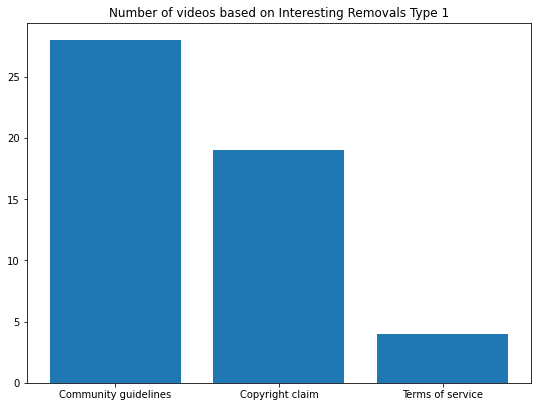

In [58]:
# Number of videos based on Interesting Removals Type 1
error_tags = list(interesting_removals1.index)
no_of_videos = list(interesting_removals1['videoId'])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(error_tags, no_of_videos)
plt.title('Number of videos based on Interesting Removals Type 1')
plt.show()

#### Interesting part 2
- Community guidelines
- Copyright claim
- Terms of service
- Unavailable

In [59]:
df['interesting_removal_2'] = df['errorType'].isin(["Community guidelines", "Copyright claim", "Terms of service", "Unavailable"])

In [60]:
print(df[df['interesting_removal_2']==True].shape)
df[df['interesting_removal_2']==True].head(2)

(2387, 49)


,AntiSJW,AntiTheist,Black,Conspiracy,LGBT,LateNightTalkShow,Libertarian,MRA,MainstreamNews,PartisanLeft,PartisanRight,Politician,QAnon,ReligiousConservative,SocialJustice,Socialist,StateFunded,WhiteIdentitarian,caption,channelId,channelTitle,channelViews,channel_description,commentCount,copyrightHolder,definition,durationSecs,errorType,errorUpdated,favoriteCount,lastSeen,licensedContent,likeCount,lr,political_categories,removed,scaled_channelViews,scaled_subs,scaled_videoViews,subs,uploadDate,uploader_tags,videoCategoryLabel,videoDescription,videoId,videoTitle,viewCount,interesting_removal_1,interesting_removal_2
26,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,True,UCZWlSUNDvCCS1hBiXV0zKcA,PragerU,1468721472,PragerU is an educational media platform dedic...,NaN,PowerfulJRE,NaN,372.0,Copyright claim,2021-01-31T00:09:02.0606238Z,NaN,2021-01-29T00:09:13.7181536Z,NaN,NaN,R,"[PartisanRight, ReligiousConservative]",True,0.094606,0.100368,0.022730,2940000.0,2020-11-02 00:00:00+00:00,NaN,NaN,NaN,s3RvFKMPpBY,Matthew McConaughey Calls Out Hollywood's Cond...,835062.0,True,True
1925,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,True,UCijDos-LUTh9RQvSCMQqN6Q,EWTN,198020094,"EWTN Global Catholic Network, in its 39th year...",NaN,NaN,NaN,3543.0,Unavailable,2021-02-03T00:47:55.813483Z,NaN,2020-12-31T00:22:52.3503658Z,NaN,NaN,C,[ReligiousConservative],True,0.012755,0.021299,0.000099,632000.0,2020-12-30 15:56:01+00:00,NaN,NaN,NaN,afLvba8hdmI,Daily Mass - 2020-12-30,3625.0,False,True


In [61]:
interesting_removals2 = df[df['errorType'].isin(["Community guidelines", "Copyright claim", "Terms of service", "Unavailable"])]
interesting_removals2 = interesting_removals2.groupby('errorType').count()[['videoId']].sort_values(by='videoId', ascending=False)
interesting_removals2

,videoId
errorType,
Unavailable,2336
Community guidelines,28
Copyright claim,19
Terms of service,4


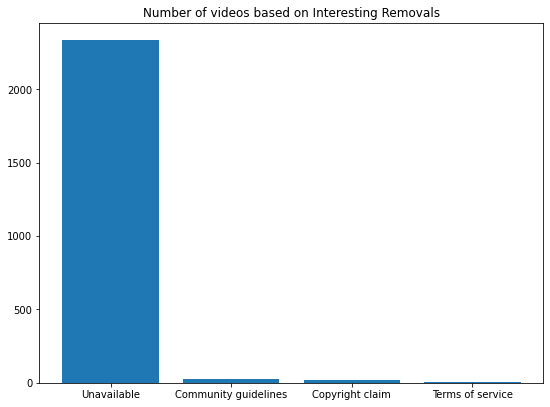

In [62]:
# Number of videos based on Interesting Removals Type 2
error_tags = list(interesting_removals2.index)
no_of_videos = list(interesting_removals2['videoId'])

fig = plt.figure(figsize=(7, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(error_tags, no_of_videos)
plt.title('Number of videos based on Interesting Removals')
plt.savefig('Number of videos based on Interesting Removals.png',bbox_inches='tight', dpi=150)
plt.show()

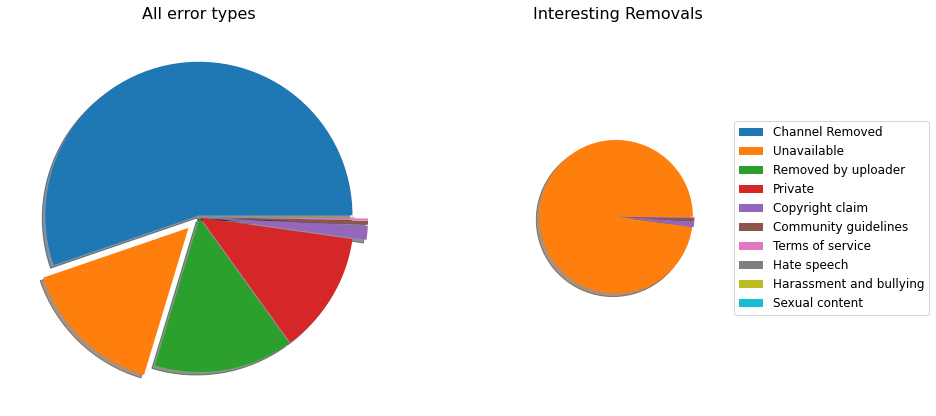

In [63]:
# make figure and assign axis objects
fig = plt.figure(figsize=(15, 7.0625))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

# large pie chart parameters
ratios = list(videos_errorType['videoId'])
labels = list(videos_errorType.index)
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
explode = (0.01, 0.1, 0.01, 0.01, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01)
ax1.pie(ratios, startangle=angle,
        # autopct='%1.1f%%', 
        shadow=True, explode=explode)
ax1.legend(labels=labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=12, 
           bbox_transform=plt.gcf().transFigure)


# small pie chart parameters
ratios = list(interesting_removals2['videoId'])
labels = list(interesting_removals2.index)
width = .2
explode = (0.01, 0, 0, 0)
ax2.pie(ratios, 
        # autopct='%1.1f%%', 
        startangle=angle,
         radius=0.5, textprops={'size': 'smaller'}, shadow=True, explode=explode, 
        colors=['#FF7F0E', '#9467BD', '#8C564B', '#E377C2'])

ax1.set_title('All error types', fontsize=16)
ax2.set_title('Interesting Removals', fontsize=16)

plt.savefig('All error types vs Interesting removals.png',bbox_inches='tight', dpi=150)
plt.show()

***
## Filter by year

(array([  215.,   354.,   211.,  1219.,  4071.,  5553., 10242., 15357.,
        36606., 46032.]),
 array([13437.03168981, 14003.89574421, 14570.75979861, 15137.62385301,
        15704.48790741, 16271.35196181, 16838.2160162 , 17405.0800706 ,
        17971.944125  , 18538.8081794 , 19105.6722338 ]),
 <BarContainer object of 10 artists>)

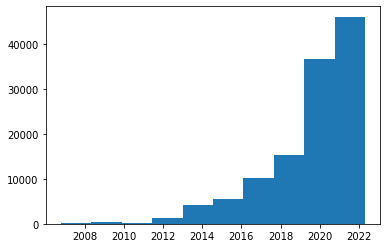

In [64]:
# Histogram of removed videos by date
plt.hist(df[df['removed']==False]['uploadDate'])

(array([2.000e+00, 6.000e+00, 1.100e+01, 1.100e+01, 5.200e+01, 9.600e+01,
        1.340e+02, 5.080e+02, 2.825e+03, 6.699e+03]),
 array([15574.02517361, 15915.923827  , 16257.82248039, 16599.72113378,
        16941.61978717, 17283.51844056, 17625.41709395, 17967.31574734,
        18309.21440073, 18651.11305412, 18993.01170752]),
 <BarContainer object of 10 artists>)

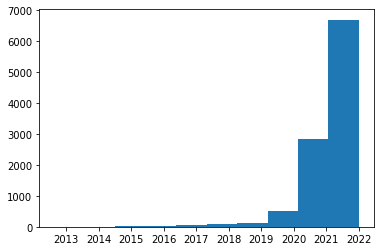

In [65]:
# Histogram of unremoved videos by date
plt.hist(df[df['removed']==True]['uploadDate'])

In [66]:
# Filter for only videos published in 2021 
print(f'Before length: {df.shape[0]:,}')
df = df[(df['uploadDate'] >= '2021-01-01') & (df['uploadDate'] < '2022-01-01')]
print(f'After length: {df.shape[0]:,}')

Before length: 130,204
After length: 35,463


In [67]:
# how many removed and unremoved?
df[df['interesting_removal_2']==True].shape[0]

1425

In [68]:
df[df['interesting_removal_2']==False].shape[0]

34038

In [69]:
df['interesting_removal_2'].value_counts(dropna=False)

False    34038
True      1425
Name: interesting_removal_2, dtype: int64

***
# Zeroes and Ones

In [70]:
df.replace(to_replace=True, value=1, inplace=True)
df.replace(to_replace=False, value=0, inplace=True)

***
# Profanity

In [71]:
# Profane True/False
highly_profane_words = pd.read_csv('highly_profanic_words.csv', encoding='utf8')['words'].to_list()

def is_profane(x):
    for word in highly_profane_words:
        if word in x:
            return 1
    return 0

df['highly_likely_profanity'] = df['videoTitle'].apply(is_profane)

In [72]:
# Profane probabilities
titles_list = df['videoTitle'].to_list()
df['profanity_probability'] = predict_prob(titles_list)

In [73]:
df.shape

(35463, 51)

***
# Sampling

- need to have datasets representing real distribution of removed/unremoved, even split unremoved and removed, and even split interesting removed and unremoved
- different percentages of sets
***

In [74]:
df_copy = df.copy()

In [75]:
# two channels have only one video.
# these must be removed because we can't stratify on channelId if we keep them
df_copy['channelId'].value_counts().tail()

UC75HVYVE-wYHGQlc4w3-GGw    6
UCzGr-CxfTv4TriTWENmfDVA    5
UC26QBHhU7My5DyD4WTXqwSg    4
UCKFUW_CSc1CkXC86HulGdAA    1
UCbP5yp0-oudHyy9Rptm-dRA    1
Name: channelId, dtype: int64

In [76]:
# removing two channels with count == 1
print(f'Before shape: {df_copy.shape[0]:,}')
df_copy = df_copy[(df_copy['channelId'] != "UCbP5yp0-oudHyy9Rptm-dRA") & (df_copy['channelId'] != "UCKFUW_CSc1CkXC86HulGdAA")]
print(f'After shape: {df_copy.shape[0]:,}')

Before shape: 35,463
After shape: 35,461


In [77]:
df_copy['channelId'].value_counts().tail()

UC3XTzVzaHQEd30rQbuvCtTQ    39
UCDmCBKaKOtOrEqgsL4-3C8Q    29
UC75HVYVE-wYHGQlc4w3-GGw     6
UCzGr-CxfTv4TriTWENmfDVA     5
UC26QBHhU7My5DyD4WTXqwSg     4
Name: channelId, dtype: int64

## Sampling strategy 1
- Proportion of removed-unremoved is same as actual dataset
- Stratified by channel

In [78]:
# Creates a DF, stratified by channelId, such that the proportion of interesting_removal_2 == True equals that of the whole dataset
def sample_strat_1(pct_of_df, ratio_of_train, ratio_of_test):
    ratio_of_train = pct_of_df * ratio_of_train
    ratio_of_test = pct_of_df * ratio_of_test
    
    # leave original DF unchanged
    df_copy = df.copy()
    
    # removing two channels with count == 1
    df_copy = df_copy[(df_copy['channelId'] != "UCbP5yp0-oudHyy9Rptm-dRA") & (df_copy['channelId'] != "UCKFUW_CSc1CkXC86HulGdAA")]

    print(f"- Original proportion interesting_removal to not: {round(df_copy[df_copy['interesting_removal_2']==True].shape[0] / df_copy[df_copy['interesting_removal_2']==False].shape[0], 2)}")

    # separate X and y
    y = df_copy.pop('interesting_removal_2')
    X = df_copy
    
    # test_train split
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = ratio_of_test, 
                                                        train_size = ratio_of_train,
                                                        stratify = X['channelId'])
    
    # show sizes
    print(f'Sampled {int(pct_of_df * 100)}% of df.')
    print(f'- Length of X_train: {len(X_train):,}')
    print(f'- Length of y_train: {len(y_train):,}')
    print(f'- Length of X_test: {len(X_test):,}')
    print(f'- Length of y_test: {len(y_test):,}')
    print(f"- Proportion interesting_removal to not: {round(y_train.value_counts().loc[1] / y_train.value_counts().loc[0], 2)}")

In [79]:
sample_strat_1(pct_of_df=1, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

- Original proportion interesting_removal to not: 0.04
Sampled 100% of df.
- Length of X_train: 28,368
- Length of y_train: 28,368
- Length of X_test: 7,093
- Length of y_test: 7,093
- Proportion interesting_removal to not: 0.04


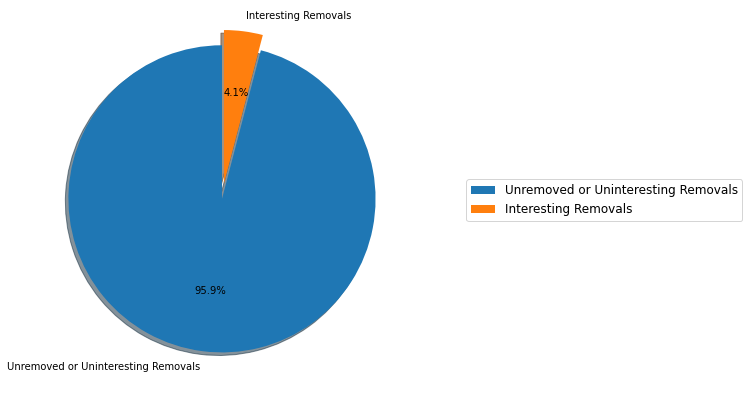

In [80]:
# 100% of representative samples

fig = plt.figure(figsize=(15, 7.0625))
ax1 = fig.subplots()

ratios = list(y_train.value_counts())
labels = ['Unremoved or Uninteresting Removals', 'Interesting Removals']

angle = -180 * ratios[0]
explode = (0, 0.1)

ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.legend(labels=labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=12, 
           bbox_transform=plt.gcf().transFigure)

plt.savefig('100% of representative samples.png',bbox_inches='tight', dpi=150)
plt.show()

## Sampling strategy 2
- Let count of removals = y
- Take an amount of unremoved videos == y
- We don't actually use this sampling strategy in the paper due to data limitations.

In [81]:
# Creates a DF, stratified by channelId, such that the number of removal == True equals the number of removal == False
def equal_proportion_df_strat_2():
    global df_sample_strat_2
    
    # leave original DF unchanged
    df_copy = df.copy()

    # removing two channels with count == 1
    df_copy = df_copy[(df_copy['channelId'] != "UCbP5yp0-oudHyy9Rptm-dRA") & (df_copy['channelId'] != "UCKFUW_CSc1CkXC86HulGdAA")]

    # Length is equal to where removed == True
    length = df_copy[df_copy['removed']==True].shape[0]

    # Sample until we have no channels with only one example
    while True:
        sample = df_copy[df_copy['removed']==False].sample(n=length)
        if sample['channelId'].value_counts().tail()[-1] > 1:
            break

    df_sample_strat_2 = pd.concat([df_copy[df_copy['removed']==True], sample])
    print(f"Length of DF to be sampled: {df_sample_strat_2.shape[0]:,}")
    print(f"# of which are removed == True: {length:,}.")
    print("*" * 30)

In [82]:
equal_proportion_df_strat_2()

Length of DF to be sampled: 14,606
# of which are removed == True: 7,303.
******************************


In [83]:
# Creates train-test split
# removed == True and removed == False will be of equal number
def sample_strat_2(pct_of_df, ratio_of_train, ratio_of_test):
    equal_proportion_df_strat_2()
    
    ratio_of_train = pct_of_df * ratio_of_train
    ratio_of_test = pct_of_df * ratio_of_test

    print(f"- Original proportion removed to not: {round(df_sample_strat_2[df_sample_strat_2['removed']==True].shape[0] / df_sample_strat_2[df_sample_strat_2['removed']==False].shape[0], 2)}")

    # separate X and y
    y = df_sample_strat_2.pop('removed')
    X = df_sample_strat_2
    
    # test_train split
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = ratio_of_test, 
                                                        train_size = ratio_of_train,
                                                        stratify = X['channelId'])
    
    # show sizes
    print(f'Sampled {int(pct_of_df * 100)}% of df.')
    print(f'- Length of X_train: {len(X_train):,}')
    print(f'- Length of y_train: {len(y_train):,}')
    print(f'- Length of X_test: {len(X_test):,}')
    print(f'- Length of y_test: {len(y_test):,}')
    print(f"- Sample proportion removed to not: {round(y_train.value_counts().loc[0] / y_train.value_counts().loc[1], 2)}")

In [84]:
# Example run
sample_strat_2(pct_of_df=1, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

Length of DF to be sampled: 14,606
# of which are removed == True: 7,303.
******************************
- Original proportion removed to not: 1.0
Sampled 100% of df.
- Length of X_train: 11,684
- Length of y_train: 11,684
- Length of X_test: 2,922
- Length of y_test: 2,922
- Sample proportion removed to not: 1.01


## Sampling strategy 3
- Let count of interesting removals = y
- Take an amount of unremoved videos == y

In [85]:
# Creates a DF, stratified by channelId, such that the number of interesting_removal_2 == True equals the number of interesting_removal_2 == False
def equal_proportion_df_strat_3():
    global df_sample_strat_3
    
    # leave original DF unchanged
    df_copy = df.copy()

    # removing two channels with count == 1
    df_copy = df_copy[(df_copy['channelId'] != "UCbP5yp0-oudHyy9Rptm-dRA") & (df_copy['channelId'] != "UCKFUW_CSc1CkXC86HulGdAA")]

    # Length is equal to where interesting_removal_2 == True
    length = df_copy[df_copy['interesting_removal_2']==True].shape[0]

    # Sample until we have no channels with only one example
    while True:
        sample = df_copy[df_copy['interesting_removal_2']==False].sample(n=length)
        if sample['channelId'].value_counts().tail()[-1] > 1:
            break

    df_sample_strat_3 = pd.concat([df_copy[df_copy['interesting_removal_2']==True], sample])
    print(f"Length of DF to be sampled: {df_sample_strat_3.shape[0]:,}")
    print(f"# of which are interesting_removal_2 == True: {length:,}.")
    print("*" * 30)

In [86]:
# Creates train-test split
def sample_strat_3(pct_of_df, ratio_of_train, ratio_of_test):
    equal_proportion_df_strat_3()
    
    ratio_of_train = pct_of_df * ratio_of_train
    ratio_of_test = pct_of_df * ratio_of_test

    print(f"- Original proportion interesting_removal_2 to not: {round(df_sample_strat_3[df_sample_strat_3['interesting_removal_2']==True].shape[0] / df_sample_strat_3[df_sample_strat_3['interesting_removal_2']==False].shape[0], 2)}")

    # separate X and y
    y = df_sample_strat_3.pop('interesting_removal_2')
    X = df_sample_strat_3
    
    # test_train split
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size = ratio_of_test, 
                                                        train_size = ratio_of_train,
                                                        stratify = y)
    
    # show sizes
    print(f'Sampled {int(pct_of_df * 100)}% of df.')
    print(f'- Length of X_train: {len(X_train):,}')
    print(f'- Length of y_train: {len(y_train):,}')
    print(f'- Length of X_test: {len(X_test):,}')
    print(f'- Length of y_test: {len(y_test):,}')
    print(f"- Proportion interesting_removal to not: {round(y_train.value_counts().loc[1] / y_train.value_counts().loc[0], 2)}")

In [87]:
# Example run
sample_strat_3(pct_of_df=1, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

Length of DF to be sampled: 2,850
# of which are interesting_removal_2 == True: 1,425.
******************************
- Original proportion interesting_removal_2 to not: 1.0
Sampled 100% of df.
- Length of X_train: 2,280
- Length of y_train: 2,280
- Length of X_test: 570
- Length of y_test: 570
- Proportion interesting_removal to not: 1.0


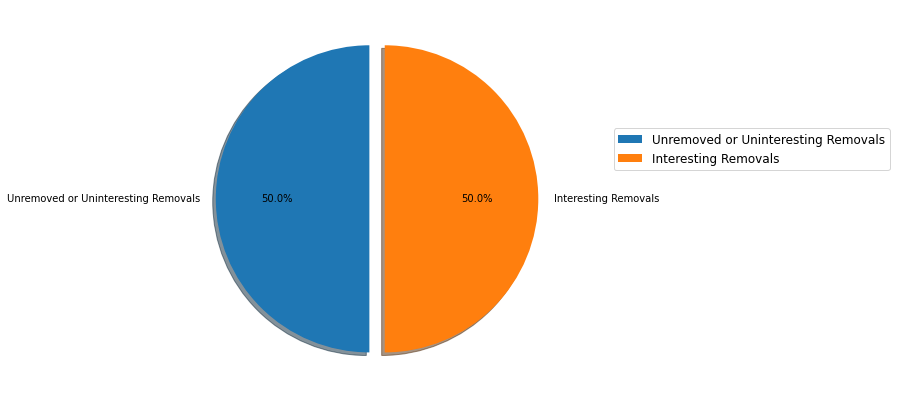

In [88]:
# 100% of even split samples

fig = plt.figure(figsize=(15, 7.0625))
ax1 = fig.subplots()

ratios = list(y_train.value_counts())
labels = ['Unremoved or Uninteresting Removals', 'Interesting Removals']

angle = -180 * ratios[0]
explode = (0, 0.1)

ax1.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.legend(labels=labels, bbox_to_anchor=(1,0.6), loc="center right", fontsize=12, 
           bbox_transform=plt.gcf().transFigure)

plt.savefig('100% of even split samples.png',bbox_inches='tight', dpi=150)
plt.show()

***
# Exporting

In [108]:
# main data folder
os.makedirs(f'data_{date_today}', exist_ok=True)

# navigate to main data folder
os.chdir(f'data_{date_today}')

# folder for representative samples
os.makedirs('rep', exist_ok=True)

# folder for stratified samples
os.makedirs('even', exist_ok=True)

### Representative samples

In [109]:
os.chdir('rep')

In [110]:
unremoved_videos_df['removed'].value_counts()

False    224584
Name: removed, dtype: int64

In [111]:
df_removed['removed'].value_counts()

True    552651
Name: removed, dtype: int64

In [112]:
df['interesting_removal_2'].value_counts()

0    34038
1     1425
Name: interesting_removal_2, dtype: int64

In [113]:
# 10% of data
os.makedirs('10',exist_ok=True)
os.chdir('10')

sample_strat_1(pct_of_df=.1, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

X_train.to_csv(f'X_train.csv', encoding='utf8')
X_test.to_csv(f'X_test.csv', encoding='utf8')
y_train.to_csv(f'y_train.csv', encoding='utf8')
y_test.to_csv(f'y_test.csv', encoding='utf8')

- Original proportion interesting_removal to not: 0.04
Sampled 10% of df.
- Length of X_train: 2,836
- Length of y_train: 2,836
- Length of X_test: 710
- Length of y_test: 710
- Proportion interesting_removal to not: 0.04


In [114]:
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

D:\UIUC\Semester 2\IS 517 Methods of Data Science\Group Project\50\data_2022-05-09\rep


In [115]:
# 50% of data
os.makedirs('50', exist_ok=True)
os.chdir('50')

sample_strat_1(pct_of_df=.5, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

X_train.to_csv(f'X_train.csv', encoding='utf8')
X_test.to_csv(f'X_test.csv', encoding='utf8')
y_train.to_csv(f'y_train.csv', encoding='utf8')
y_test.to_csv(f'y_test.csv', encoding='utf8')

- Original proportion interesting_removal to not: 0.04
Sampled 50% of df.
- Length of X_train: 14,184
- Length of y_train: 14,184
- Length of X_test: 3,547
- Length of y_test: 3,547
- Proportion interesting_removal to not: 0.04


In [116]:
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

D:\UIUC\Semester 2\IS 517 Methods of Data Science\Group Project\50\data_2022-05-09\rep


In [117]:
# 100% of data
os.makedirs('100', exist_ok=True)
os.chdir('100')

sample_strat_1(pct_of_df=1, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

X_train.to_csv(f'X_train.csv', encoding='utf8')
X_test.to_csv(f'X_test.csv', encoding='utf8')
y_train.to_csv(f'y_train.csv', encoding='utf8')
y_test.to_csv(f'y_test.csv', encoding='utf8')

- Original proportion interesting_removal to not: 0.04
Sampled 100% of df.
- Length of X_train: 28,368
- Length of y_train: 28,368
- Length of X_test: 7,093
- Length of y_test: 7,093
- Proportion interesting_removal to not: 0.04


In [118]:
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))
print(os.getcwd())

D:\UIUC\Semester 2\IS 517 Methods of Data Science\Group Project\50\data_2022-05-09


### Even split samples

In [119]:
os.chdir('even')

In [120]:
# 10% of data
os.makedirs('10', exist_ok=True)
os.chdir('10')

sample_strat_3(pct_of_df=.1, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

X_train.to_csv(f'X_train.csv', encoding='utf8')
X_test.to_csv(f'X_test.csv', encoding='utf8')
y_train.to_csv(f'y_train.csv', encoding='utf8')
y_test.to_csv(f'y_test.csv', encoding='utf8')

Length of DF to be sampled: 2,850
# of which are interesting_removal_2 == True: 1,425.
******************************
- Original proportion interesting_removal_2 to not: 1.0
Sampled 10% of df.
- Length of X_train: 228
- Length of y_train: 228
- Length of X_test: 58
- Length of y_test: 58
- Proportion interesting_removal to not: 1.0


In [121]:
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

D:\UIUC\Semester 2\IS 517 Methods of Data Science\Group Project\50\data_2022-05-09\even


In [122]:
# 50% of data
os.makedirs('50', exist_ok=True)
os.chdir('50')

sample_strat_3(pct_of_df=.5, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

X_train.to_csv(f'X_train.csv', encoding='utf8')
X_test.to_csv(f'X_test.csv', encoding='utf8')
y_train.to_csv(f'y_train.csv', encoding='utf8')
y_test.to_csv(f'y_test.csv', encoding='utf8')

Length of DF to be sampled: 2,850
# of which are interesting_removal_2 == True: 1,425.
******************************
- Original proportion interesting_removal_2 to not: 1.0
Sampled 50% of df.
- Length of X_train: 1,140
- Length of y_train: 1,140
- Length of X_test: 285
- Length of y_test: 285
- Proportion interesting_removal to not: 1.0


In [123]:
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

D:\UIUC\Semester 2\IS 517 Methods of Data Science\Group Project\50\data_2022-05-09\even


In [124]:
# 100% of data
os.makedirs('100', exist_ok=True)
os.chdir('100')

sample_strat_3(pct_of_df=1, 
               ratio_of_train=.8, 
               ratio_of_test=.2)

X_train.to_csv(f'X_train.csv', encoding='utf8')
X_test.to_csv(f'X_test.csv', encoding='utf8')
y_train.to_csv(f'y_train.csv', encoding='utf8')
y_test.to_csv(f'y_test.csv', encoding='utf8')

Length of DF to be sampled: 2,850
# of which are interesting_removal_2 == True: 1,425.
******************************
- Original proportion interesting_removal_2 to not: 1.0
Sampled 100% of df.
- Length of X_train: 2,280
- Length of y_train: 2,280
- Length of X_test: 570
- Length of y_test: 570
- Proportion interesting_removal to not: 1.0


In [125]:
os.chdir(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
print(os.getcwd())

D:\UIUC\Semester 2\IS 517 Methods of Data Science\Group Project\50


In [126]:
df['errorType'].value_counts()

Removed by uploader     3921
Private                 1958
Unavailable             1400
Community guidelines      20
Copyright claim            3
Terms of service           2
Name: errorType, dtype: int64